In [1]:
import pandas as pd

In [2]:
opt=pd.read_csv('./data/order_products__train.csv')
opp=pd.read_csv('./data/order_products__prior.csv')
products=pd.read_csv('./data/products.csv')

In [3]:
opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB


In [4]:
opp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


## 결측치 확인
- 3개의 데이터에 결측치가 없음을 볼 수 있다.

# 가설 1 ) 판매량
- 제일 많이 판매되는 상품?
- 어떤 카테고리가 제일 많이 팔릴까
- 각 카테고리에서 제일 많이 팔리는 제품을 나타내기
- 카트에 많이 담은 제품일수록 재구매율이 높다

## 1. 가장 많이 판매되는 상품은?
### 1-1 ) OPP & OPT concat 하기
- order_products_train & order_products_prior은 주문 세부 내역을 분할한 것이기 때문에 concat를 실행   
   ⇒ order_info DataFrame을 생성  ( 33819106 개의 row, 4개의 column을 가짐 ) 

In [22]:
order_info = pd.concat([opt, opp], axis=0)

In [23]:
order_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 1.3 GB


In [24]:
order_info.to_csv("order_info.csv", header=True)

### 1-2 ) groupby () 통해 파생변수 생성 
- 각 product 별로 많이 팔리는 상품을 알아야 하므로 product_id에 대해 groupby, count 를 이용해 product_id 별 order_id갯수를 count해서 Total_orders 라는 파생변수 생성
-  49685의 row, 2개의 column 가짐

In [6]:
grouped = order_info.groupby("product_id")["order_id"].aggregate({'Total_orders': 'count'}).reset_index()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [7]:
grouped

,product_id,Total_orders
0,1,1928
1,2,94
2,3,283
3,4,351
4,5,16
...,...,...
49680,49684,9
49681,49685,49
49682,49686,127
49683,49687,14


### 1-3 ) 제일 많이 구매되는 상품을 알아야하므로 total_orders가 높은 순서대로 정렬 수행

In [8]:
grouped=grouped.sort_values(by='Total_orders', ascending=False)

In [9]:
grouped # 주문량이 많은 데이터부터 ~ 적은 데이터까지 

,product_id,Total_orders
24849,24852,491291
13173,13176,394930
21134,21137,275577
21900,21903,251705
47205,47209,220877
...,...,...
35887,35890,1
13394,13397,1
15385,15388,1
35949,35952,1


### 1-4 ) Merge 수행 
- 제일 많이 판매되는 상품명이 무엇인지 알기 위해 order_info 와 products 데이터 프레임을 product_id를 기준으로  inner join 함.
- 49685 rows × 5 columns

In [10]:
orderbest=pd.merge(grouped, products, how='inner')

In [11]:
orderbest

,product_id,Total_orders,product_name,aisle_id,department_id
0,24852,491291,Banana,24,4
1,13176,394930,Bag of Organic Bananas,24,4
2,21137,275577,Organic Strawberries,24,4
3,21903,251705,Organic Baby Spinach,123,4
4,47209,220877,Organic Hass Avocado,24,4
...,...,...,...,...,...
49680,35890,1,Petite Black Eyed Peas,63,9
49681,13397,1,"Molasses, Bead",66,6
49682,15388,1,Orange Flavored Ice Cubes,37,1
49683,35952,1,Peachtree Schnapps,124,5


In [12]:
# product 정보와 총 주문량 정리
orderbest.to_csv("orderbest.csv", header=False)

In [13]:
# type, null 값 확인
orderbest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49685 entries, 0 to 49684
Data columns (total 5 columns):
product_id       49685 non-null int64
Total_orders     49685 non-null int64
product_name     49685 non-null object
aisle_id         49685 non-null int64
department_id    49685 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.3+ MB


### 1-5 ) 주문량이 많은 상위 20개의 데이터 추출
- 상위 20개의 데이터만 추출해서 그래프 그릴 예정

In [14]:
best20=orderbest[:20]
best20

,product_id,Total_orders,product_name,aisle_id,department_id
0,24852,491291,Banana,24,4
1,13176,394930,Bag of Organic Bananas,24,4
2,21137,275577,Organic Strawberries,24,4
3,21903,251705,Organic Baby Spinach,123,4
4,47209,220877,Organic Hass Avocado,24,4
5,47766,184224,Organic Avocado,24,4
6,47626,160792,Large Lemon,24,4
7,16797,149445,Strawberries,24,4
8,26209,146660,Limes,24,4
9,27845,142813,Organic Whole Milk,84,16


### 1-6 ) 주문량 많은 상위 20개 데이터 시각화 ( histogram )

In [15]:
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


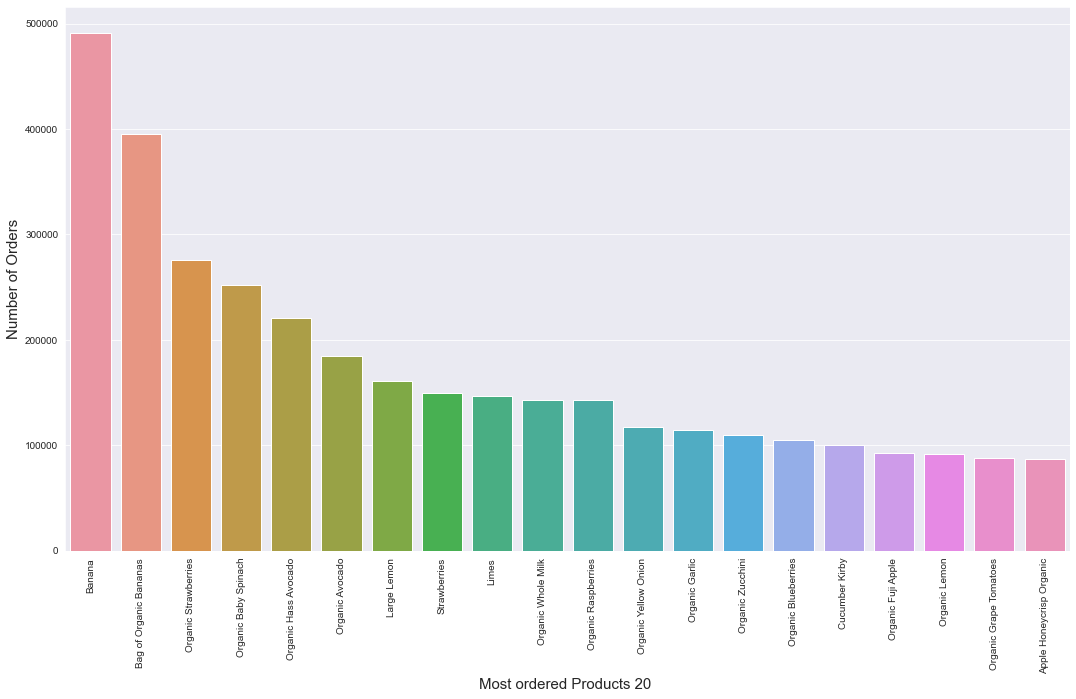

In [61]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(18, 10))
plt.xticks(rotation='vertical')
sns.barplot(best20.product_name, best20.Total_orders)                 
plt.ylabel('Number of Orders', fontsize=15)
plt.xlabel('Most ordered Products 20 ', fontsize=15)
#plt.show()
plt.savefig('hypo1.png')

## 어떤 카테고리가 제일 많이 팔릴까?
- 제품의 카테고리 정보가 있는 department DataFrame 이용
- 이전에 각 제품과 주문량의 정보가 있는 orderbest DataFrame 이용
### 2-1 ) orderbest DataFrame 정보 확인

In [16]:
orderbest.head()

,product_id,Total_orders,product_name,aisle_id,department_id
0,24852,491291,Banana,24,4
1,13176,394930,Bag of Organic Bananas,24,4
2,21137,275577,Organic Strawberries,24,4
3,21903,251705,Organic Baby Spinach,123,4
4,47209,220877,Organic Hass Avocado,24,4


In [17]:
orderbest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49685 entries, 0 to 49684
Data columns (total 5 columns):
product_id       49685 non-null int64
Total_orders     49685 non-null int64
product_name     49685 non-null object
aisle_id         49685 non-null int64
department_id    49685 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.3+ MB


### 2-2 ) Department DataFrame과의 Merge 수행

In [18]:
departments= pd.read_csv('./data/departments.csv')

In [19]:
product_specific=pd.merge(orderbest, departments, how='inner')

In [20]:
product_specific.head()

,product_id,Total_orders,product_name,aisle_id,department_id,department
0,24852,491291,Banana,24,4,produce
1,13176,394930,Bag of Organic Bananas,24,4,produce
2,21137,275577,Organic Strawberries,24,4,produce
3,21903,251705,Organic Baby Spinach,123,4,produce
4,47209,220877,Organic Hass Avocado,24,4,produce


In [21]:
# product 정보, 주문량 , department 명 저장한 파일
product_specific.to_csv("product_specific.csv", header=False)

### 2-3 ) merge한 data에 대해서 속성, 결측치 파악
- 결측치는 존재하지 않음

In [35]:
product_specific.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49685 entries, 0 to 49684
Data columns (total 6 columns):
product_id       49685 non-null int64
Total_orders     49685 non-null int64
product_name     49685 non-null object
aisle_id         49685 non-null int64
department_id    49685 non-null int64
department       49685 non-null object
dtypes: int64(4), object(2)
memory usage: 3.9+ MB


In [38]:
len(product_specific['department'].unique())

21

In [40]:
len(departments)

21

### 2-4 ) 각 department 별로 제품의 총 갯수를 sum() 
- department 별 구매량의 차이를 보기 위해서 진행
- groupby() 함수 사용

In [41]:
department_product_number = product_specific.groupby("department")["Total_orders"].aggregate({'total_order_num': 'sum'}).reset_index()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [42]:
department_product_number

,department,total_order_num
0,alcohol,159294
1,babies,438743
2,bakery,1225181
3,beverages,2804175
4,breakfast,739069
5,bulk,35932
6,canned goods,1114857
7,dairy eggs,5631067
8,deli,1095540
9,dry goods pasta,905340


### 2-5 ) 제품의 대분류 별 총 주문 갯수를 오름차순으로 파악 : sort()

In [43]:
department_product_number=department_product_number.sort_values(by='total_order_num')

In [44]:
department_product_number

,department,total_order_num
5,bulk,35932
15,other,38086
14,missing,77396
18,pets,102221
0,alcohol,159294
12,international,281155
1,babies,438743
17,personal care,468693
4,breakfast,739069
13,meat seafood,739238


### 2-6 ) 제품의 대분류 별 제품의 판매 갯수를 알아보기 위해 시각화

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


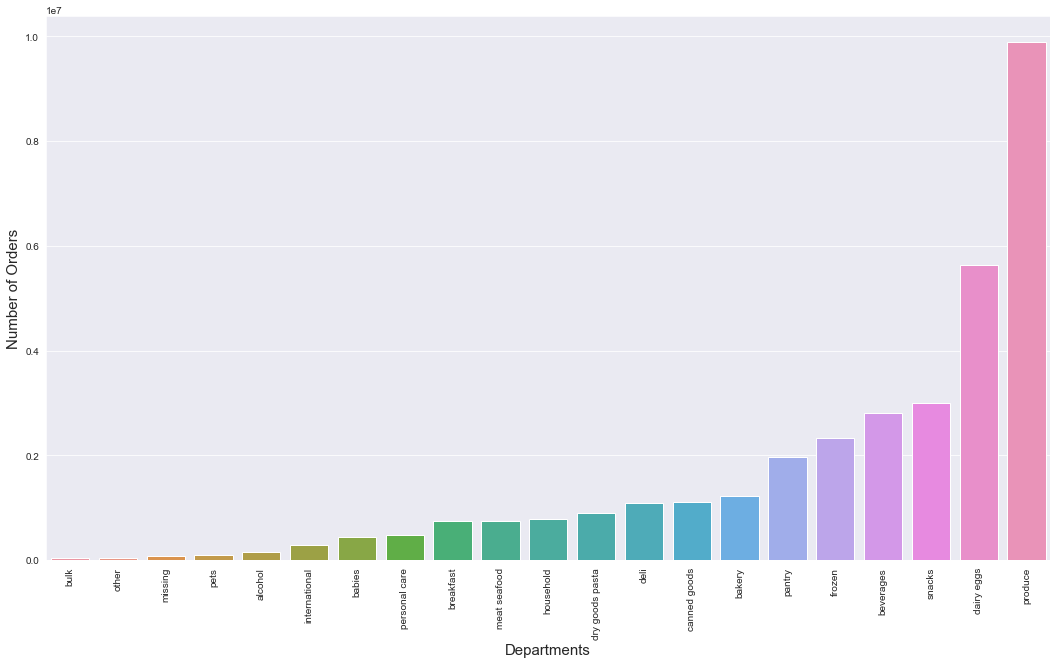

In [60]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(18, 10))
plt.xticks(rotation='vertical')
sns.barplot(department_product_number.department, department_product_number.total_order_num)                 
plt.ylabel('Number of Orders', fontsize=15)
plt.xlabel('Departments', fontsize=15)
#plt.show()
plt.savefig('hypo2.png')

### 2-7 ) Result 
- produce 카테고리에 속한 제품들이 제일 많이 판매되었음을 알 수 있음 
- 그러나 produce 카테고리의 주문량이 제일 많다고 해서 그 제품들이 인기가 많다고 보긴 어려움 
    - Why? 제품의 갯수 자이가 있을 수 있기 때문임
    - So, 각 카테고리 별 제품의 갯수를 확인해보기

### 2-8 ) 각 카테고리 별 제품의 갯수 확인하기
- product_specific dataframe 가지고 groupby 수행 ( aggfunc= count)

In [50]:
product_specific.head()

,product_id,Total_orders,product_name,aisle_id,department_id,department
0,24852,491291,Banana,24,4,produce
1,13176,394930,Bag of Organic Bananas,24,4,produce
2,21137,275577,Organic Strawberries,24,4,produce
3,21903,251705,Organic Baby Spinach,123,4,produce
4,47209,220877,Organic Hass Avocado,24,4,produce


In [51]:
department_cnt = product_specific.groupby("department")["product_id"].aggregate({'product_num': 'count'}).reset_index()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [52]:
department_cnt

,department,product_num
0,alcohol,1054
1,babies,1081
2,bakery,1516
3,beverages,4364
4,breakfast,1114
5,bulk,38
6,canned goods,2092
7,dairy eggs,3449
8,deli,1322
9,dry goods pasta,1858


In [54]:
department_cnt=department_cnt.sort_values(by='product_num')

In [55]:
department_cnt

,department,product_num
5,bulk,38
15,other,548
13,meat seafood,907
18,pets,972
0,alcohol,1054
1,babies,1081
4,breakfast,1114
12,international,1139
14,missing,1258
8,deli,1322


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


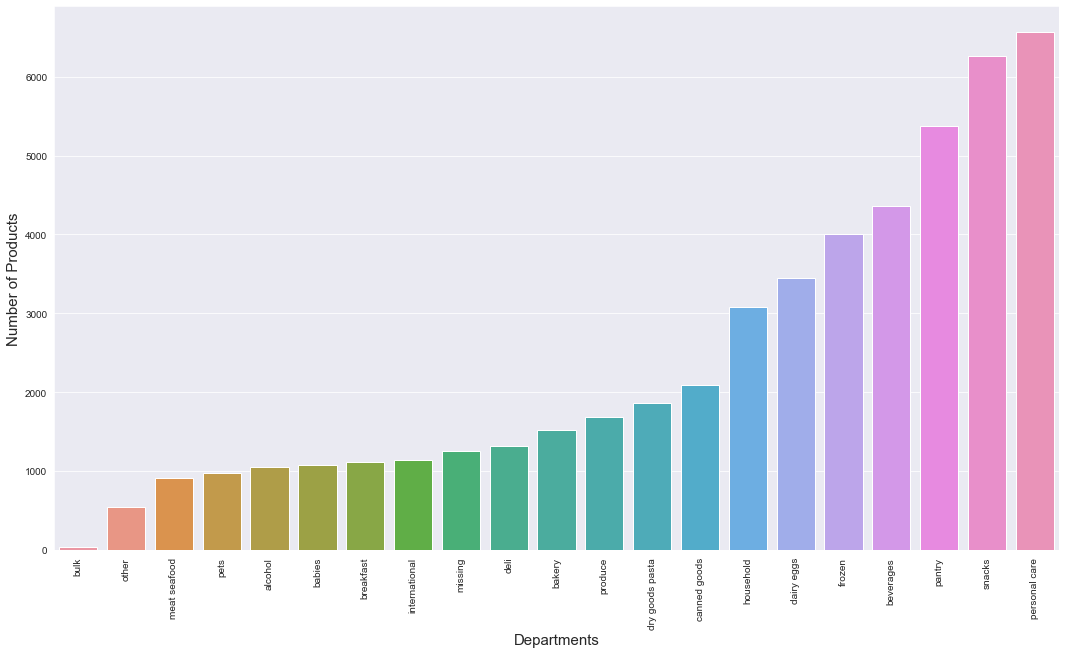

In [59]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(18, 10))
plt.xticks(rotation='vertical')
sns.barplot(department_cnt.department, department_cnt.product_num)                 
plt.ylabel('Number of Products', fontsize=15)
plt.xlabel('Departments', fontsize=15)
#plt.show()
plt.savefig('hypo3.png')

## 3. 각 카테고리에서 제일 많이 팔리는 제품?
- 제품명과 카테고리명을 알아야하므로 product_specific 데이터프레임 사용

In [62]:
product_specific.head()

,product_id,Total_orders,product_name,aisle_id,department_id,department
0,24852,491291,Banana,24,4,produce
1,13176,394930,Bag of Organic Bananas,24,4,produce
2,21137,275577,Organic Strawberries,24,4,produce
3,21903,251705,Organic Baby Spinach,123,4,produce
4,47209,220877,Organic Hass Avocado,24,4,produce


In [64]:
grouped11 = product_specific.groupby(["department", "product_name"])["Total_orders"].aggregate({'Total_products': 'sum'}).reset_index()
grouped11

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,department,product_name,Total_products
0,alcohol,'Swingtop' Premium Lager,1
1,alcohol,007 Vodka With Martini Glasses,2
2,alcohol,10 Year Aged Limited Release Frontier Whiskey,3
3,alcohol,10 Yr Single Malt Scotch Islay,26
4,alcohol,100% Agave,32
...,...,...,...
49680,snacks,with Xylitol Minty Sweet Twist 18 Sticks Sugar...,27
49681,snacks,with Xylitol Original Flavor 18 Sticks Sugar F...,192
49682,snacks,with Xylitol Unwrapped Original Flavor 50 Stic...,41
49683,snacks,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,57


In [71]:
grouped11.sort_values(by=['department', 'Total_products'], ascending=False, inplace=True)


In [79]:
idx=grouped11['department'].unique()

In [80]:
grouped11[grouped11['department']==idx[0]].iloc[:5,:]

,department,product_name,Total_products
46345,snacks,Lightly Salted Baked Snap Pea Crisps,25941
47678,snacks,Original Veggie Straws,17534
48551,snacks,Sea Salt Pita Chips,17333
48043,snacks,Pretzel Crisps Original Deli Style Pretzel Cra...,16584
48507,snacks,Sea Salt & Vinegar Potato Chips,15397
